In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [12]:
def random_spin_field(N,M):
    return np.random.choice([1,1], size=(N,M))

field = random_spin_field(20,20)

Nparticles = 100

print(field)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [13]:
def GetEnergy(Matrix):
    
    n = Matrix.shape[0]
    m = Matrix.shape[1]
    
    energy = 0
    J = -1
    
    for i in range(n):
        for j in range(m):
            
            if i == 0:
                down = -1
            else:
                down = i-1
                
            if i == n-1:
                up = 0
            else:
                up = i+1
            
            if j == 0:
                left = -1
            else:
                left = j-1
                
            if j == m-1:
                right = 0
            else:
                right = j+1
            
            energy += 0.5*J*Matrix[i,j]* \
            (Matrix[down,j]+Matrix[up,j]+Matrix[i,left]+Matrix[i,right])
    
    return energy, energy**2

In [14]:
print(GetEnergy(field), np.sum(field.ravel()))
from random import randint, uniform

((-800.0, 640000.0), 400)


In [15]:
def _ising_step(Matrix, T):
    
    beta = 1./T
    
    current = Matrix
    energy1, energy12 = GetEnergy(current)
    
    n = Matrix.shape[0]
    m = Matrix.shape[1]
    
    # Caculando el futuro
    
    x=randint(0,m-1)
    y=randint(0,n-1)
    
    
    future = current
    future[y,x] = -1.*current[y,x]
    
    energy2, energy22 = GetEnergy(future)
    
    dE = energy2-energy1
    
    final = current
    
    if dE < 0.:
        final = future
    
    elif np.exp(-dE * beta) > np.random.rand(): 
        final = future
    
    return final

In [16]:
Energies = []
Energies2 = []
Cv = []
Magnetization = []

T = 2.4

for i in tqdm(range(1000)):
    matrix = _ising_step(field, T)
    energy, energy2 = GetEnergy(matrix)
    Energies.append(energy)
    Energies2.append(energy2)
    Magnetization.append(np.sum(matrix.ravel())) 
    

cv = (np.average(Energies2)-np.average(Energies)**2)/T**2
    
print(np.average(Energies), np.average(Magnetization), cv)

100%|██████████| 1000/1000 [00:02<00:00, 485.20it/s]

(-111.756, 82.432, 3754.6424416666673)


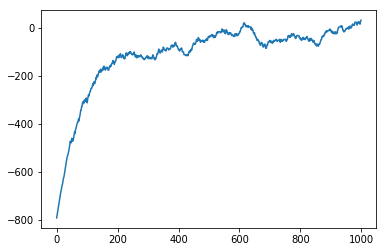

In [17]:
plt.plot(Energies)

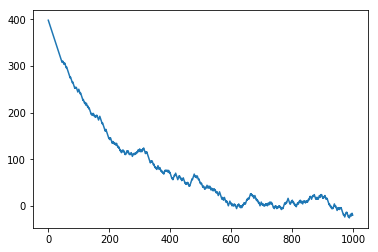

In [18]:
plt.plot(Magnetization)

In [32]:
# Ahora lo vamos a hacer para un set de temperaturas

def GetTemperature(field, T, NToys = 1000):
    
    field = random_spin_field(20,20)
    
    Energies = []
    Energies2 = []
    Cv = []
    Magnetization = []

 
    for i in range(NToys):
        matrix = _ising_step(field, T)
        energy, energy2 = GetEnergy(matrix)
        Energies.append(energy)
        Energies2.append(energy2)
        Magnetization.append(np.sum(matrix.ravel())) 
    

    cv = (np.average(Energies2)-np.average(Energies)**2)/T**2
    
    return np.average(Energies), np.average(Magnetization), cv

In [33]:
T = np.arange(0.05,2.5,0.1)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in tqdm(range(len(T))):
    Energy[t], Mag[t], Cv[t] = GetTemperature(field,T[t])
    print(GetTemperature(field,T[t]))



  0%|          | 0/25 [00:00<?, ?it/s]

  4%|▍         | 1/25 [00:03<01:26,  3.59s/it]

(-78.972, 96.132, 11078188.4864)




  8%|▊         | 2/25 [00:07<01:23,  3.62s/it]

(-82.232, 90.312, 1184812.541155555)




 12%|█▏        | 3/25 [00:10<01:19,  3.61s/it]

(-78.956, 52.924, 410881.76102399983)




 16%|█▌        | 4/25 [00:14<01:16,  3.62s/it]

(-72.604, 70.676, 227650.63823673467)




 20%|██        | 5/25 [00:18<01:11,  3.59s/it]

(-81.14, 74.344, 125546.8069135802)




 24%|██▍       | 6/25 [00:21<01:07,  3.57s/it]

(-94.16, 86.716, 95265.55504132227)




 28%|██▊       | 7/25 [00:25<01:04,  3.58s/it]

(-68.368, 76.676, 67264.13390769229)




 32%|███▏      | 8/25 [00:28<01:00,  3.58s/it]

(-68.808, 69.932, 55942.74690844441)




 36%|███▌      | 9/25 [00:32<00:56,  3.55s/it]

(-58.552, 73.452, 42433.172728027654)




 40%|████      | 10/25 [00:35<00:53,  3.59s/it]

(-90.248, 80.22, 26495.43545263157)




 44%|████▍     | 11/25 [00:39<00:50,  3.62s/it]

(-73.444, 79.408, 22220.896928798178)




 48%|████▊     | 12/25 [00:43<00:46,  3.61s/it]

(-73.984, 87.624, 16973.598294139876)




 52%|█████▏    | 13/25 [00:46<00:43,  3.61s/it]

(-75.052, 82.5, 19170.45586943999)




 56%|█████▌    | 14/25 [00:50<00:39,  3.62s/it]

(-59.628, 74.0, 15204.085386008224)




 60%|██████    | 15/25 [00:54<00:37,  3.71s/it]

(-108.488, 93.836, 10280.706709155762)




 64%|██████▍   | 16/25 [00:58<00:34,  3.86s/it]

(-82.036, 70.704, 9759.87292570239)




 68%|██████▊   | 17/25 [01:02<00:30,  3.87s/it]

(-78.984, 93.916, 9432.433331129474)




 72%|███████▏  | 18/25 [01:06<00:26,  3.83s/it]

(-74.768, 83.492, 9225.82797583673)




 76%|███████▌  | 19/25 [01:09<00:22,  3.79s/it]

(-81.112, 83.636, 7014.562295398099)




 80%|████████  | 20/25 [01:13<00:18,  3.75s/it]

(-72.14, 85.772, 5799.73712031558)




 84%|████████▍ | 21/25 [01:17<00:14,  3.69s/it]

(-49.636, 71.604, 6581.765021772751)




 88%|████████▊ | 22/25 [01:20<00:10,  3.65s/it]

(-64.28, 73.42, 5991.151454840453)




 92%|█████████▏| 23/25 [01:24<00:07,  3.62s/it]

(-75.092, 80.948, 5411.6803034074055)




 96%|█████████▌| 24/25 [01:27<00:03,  3.64s/it]

(-79.976, 75.572, 4361.050868990492)




100%|██████████| 25/25 [01:31<00:00,  3.66s/it]

(-71.904, 76.196, 4327.709918200749)


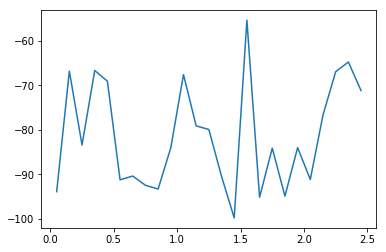

In [34]:
plt.plot(T,Energy)

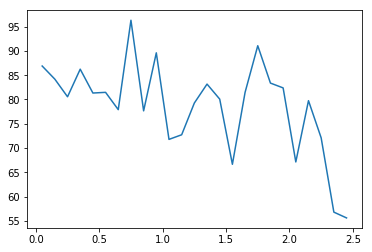

In [35]:
plt.plot(T,Mag)

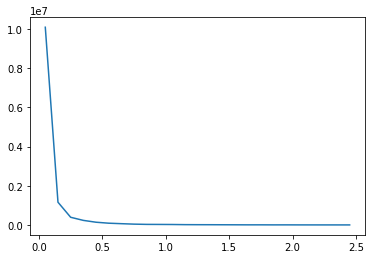

In [36]:
plt.plot(T,Cv)